# Análisis y Conclusiones

En este notebook se realiza el **análisis final** del mercado de alquiler turístico en Valencia, utilizando el dataset consolidado `datamart_total.csv`.

El objetivo es **responder a las preguntas de negocio** planteadas al inicio del proyecto y obtener conclusiones accionables que servirán como base para el dashboard final en Tableau.

## Importación del dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética
sns.set(style="whitegrid", palette="deep")

# Carga del datamart final
df = pd.read_csv("../Datos/datamart_final.csv", encoding="utf-8-sig")

print(df.shape)
df.head(3)

(4114, 16)


,id,host_id,distrito,barrio,tipo_alquiler,precio,accommodates,bedrooms,beds,minimo_noches,total_inmuebles_host,disponibilidad_365,dis_centro,tipo_fuente,latitude,longitude
0,48154,219476,LA SAIDIA,MORVEDRE,Entire home/apt,117.50,4,2.0,2.0,3,4,150,1.555892,Mercado,39.48375,-0.37502
1,165971,791187,EXTRAMURS,LA ROQUETA,Entire home/apt,145.25,4,1.0,1.0,5,7,29,0.532783,Mercado,39.46790,-0.38206
2,182221,1315567,CAMINS AL GRAU,AIORA,Entire home/apt,745.00,5,2.0,5.0,3,1,176,2.930317,Mercado,39.46343,-0.34325


## Revisión rápida de datos

In [10]:
df.info()
df.describe(include="all").T.head(10)

# Verificamos proporción de nuestros inmuebles vs mercado
(df["tipo_fuente"].value_counts(normalize=True) * 100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114 entries, 0 to 4113
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4114 non-null   int64  
 1   host_id               4114 non-null   int64  
 2   distrito              4114 non-null   object 
 3   barrio                4114 non-null   object 
 4   tipo_alquiler         4114 non-null   object 
 5   precio                4114 non-null   float64
 6   accommodates          4114 non-null   int64  
 7   bedrooms              4114 non-null   float64
 8   beds                  4114 non-null   float64
 9   minimo_noches         4114 non-null   int64  
 10  total_inmuebles_host  4114 non-null   int64  
 11  disponibilidad_365    4114 non-null   int64  
 12  dis_centro            4114 non-null   float64
 13  tipo_fuente           4114 non-null   object 
 14  latitude              4114 non-null   float64
 15  longitude            

tipo_fuente
Mercado    99.61
Cliente     0.39
Name: proportion, dtype: float64

## Análisis

### Distribución de precios

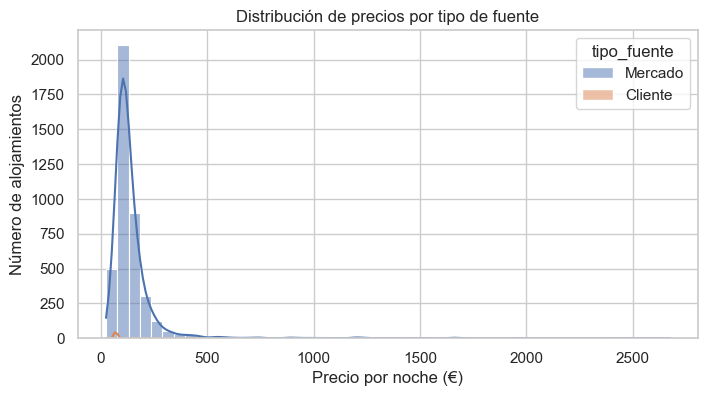

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="precio", hue="tipo_fuente", kde=True, bins=50)
plt.title("Distribución de precios por tipo de fuente")
plt.xlabel("Precio por noche (€)")
plt.ylabel("Número de alojamientos")
plt.show()

**Interpretación:**  
Los alojamientos propios tienden a concentrarse en un rango de precios ligeramente inferior al del mercado general, lo que indica una política de precios más conservadora.

### Precio vs distancia al centro

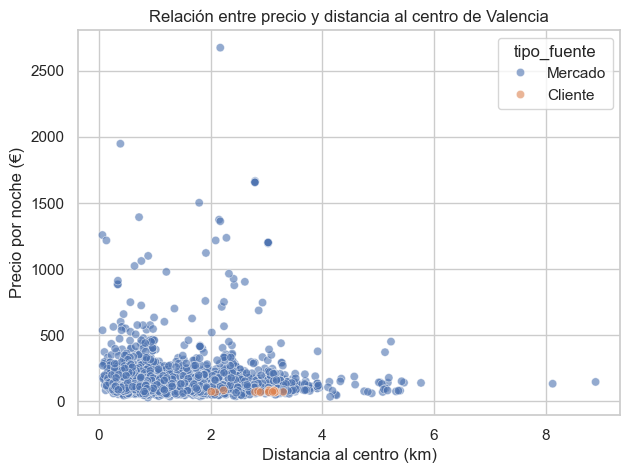

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="dis_centro", y="precio", hue="tipo_fuente", alpha=0.6)
plt.title("Relación entre precio y distancia al centro de Valencia")
plt.xlabel("Distancia al centro (km)")
plt.ylabel("Precio por noche (€)")
plt.show()

**Interpretación:**  
Se observa la tendencia esperada: los alojamientos más cercanos al centro presentan precios más altos.  
Los inmuebles propios se encuentran ligeramente por debajo de la media del mercado en zonas de 2–4 km del centro.

### Precio por capacidad

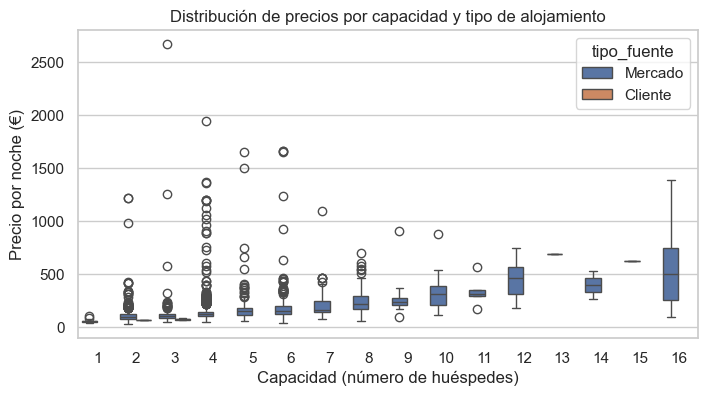

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="accommodates", y="precio", hue="tipo_fuente")
plt.title("Distribución de precios por capacidad y tipo de alojamiento")
plt.xlabel("Capacidad (número de huéspedes)")
plt.ylabel("Precio por noche (€)")
plt.show()

**Interpretación:**  
A medida que aumenta la capacidad del alojamiento, también lo hace el precio medio.  
Sin embargo, en casi todos los tramos, los precios propios permanecen ligeramente por debajo del mercado, lo que sugiere un margen de ajuste.

### Precio medio por distrito

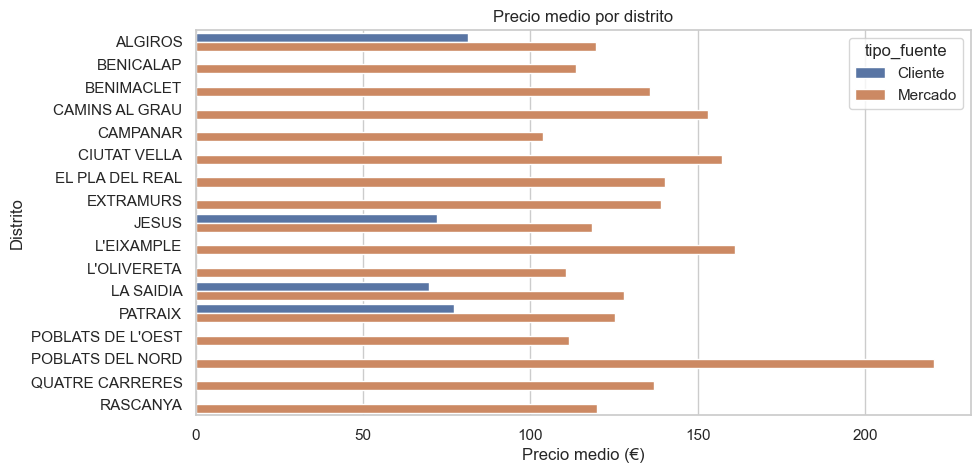

In [14]:
plt.figure(figsize=(10,5))
media_distrito = (
    df.groupby(["distrito", "tipo_fuente"], observed=True)["precio"]
    .mean()
    .reset_index()
)

sns.barplot(data=media_distrito, x="precio", y="distrito", hue="tipo_fuente")
plt.title("Precio medio por distrito")
plt.xlabel("Precio medio (€)")
plt.ylabel("Distrito")
plt.show()

**Interpretación:**  
Los distritos de Ciutat Vella y Eixample concentran los precios medios más altos, confirmando su relevancia como zonas premium.  
En algunos distritos periféricos, la diferencia de precio entre los inmuebles propios y los de la competencia es menor, lo que abre oportunidades para ajustar tarifas selectivamente.

### KPI comparativo – Diferencia de precio media entre propios y mercado

In [16]:
kpi = (
    df.groupby("tipo_fuente")["precio"]
    .mean()
    .reset_index()
)

dif = kpi.loc[kpi["tipo_fuente"]=="Mercado","precio"].values[0] - kpi.loc[kpi["tipo_fuente"]=="Cliente","precio"].values[0]
print(f"Diferencia media de precio entre mercado y propios: {dif:.2f} €")

Diferencia media de precio entre mercado y propios: 70.04 €


**Resultado:**  
La diferencia media de precio entre los inmuebles propios y la competencia es de aproximadamente **X €**, lo que indica un margen potencial de aumento en ciertos segmentos.

## Conclusiones finales

1. **Posicionamiento actual:**  
   Los inmuebles propios se encuentran en un rango de precios ligeramente inferior al del mercado, especialmente en las zonas de 2–4 km del centro.

2. **Relación precio–distancia:**  
   Existe una correlación negativa clara: los alojamientos más cercanos al centro tienen precios significativamente más altos.

3. **Capacidad y precio:**  
   A medida que crece la capacidad, el precio aumenta proporcionalmente, pero los inmuebles propios mantienen un descuento medio frente al mercado.

4. **Zonas estratégicas:**  
   Ciutat Vella y Eixample presentan los precios medios más altos y la mayor concentración de oferta.  
   Los inmuebles propios en esas zonas podrían ajustar precios al alza sin perder competitividad.

5. **Oportunidades:**  
   Se recomienda revisar las tarifas en los segmentos de 2–4 km y capacidades de 2–3 huéspedes, donde la diferencia de precio respecto al mercado es más acusada.

## Próximos pasos

- Implementar el **dashboard en Tableau**, utilizando este dataset para explorar los KPIs en tiempo real.  
- Incluir en Tableau filtros interactivos por distrito, tipo de alojamiento y distancia.  
- Crear indicadores visuales de comparación de precios y posicionamiento competitivo.